# 2A. Monsoon (Wang)

This notebook demonstrates how to use the PCDMI Monsoon (Wang) driver.

It is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

The following cell reads in the choices you made during the download data step.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [ ]:
# To open and display one of the graphics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import os
import glob

%matplotlib inline

In [18]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

## Basic Example

The Monsoon (Wang) driver is simple and does not require many settings. These are the required parameters:  
```  
modnames   
test_data_path  
reference_data_path   
results_dir  
```  

For a full look at the driver options available, use `monsoon_wang_driver.py --help` in the command line.

Important note about `threshold`: The default threshold for the threat score is 2.5 mm/day, but the Monsoon (Wang) driver assumes that the precipitation inputs are in units of kg m-2 s-1 and adjust the threshold value accordingly. **If your precipitation data uses units of mm/day, set `threshold = 2.5`.**

First, display the parameter file used for this example:

In [2]:
with open("basic_monsoon_wang_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# LIST OF MODEL VERSIONS TO BE TESTED
modnames = ['CanCM4']

# ROOT PATH FOR MODELS CLIMATOLOGIES
test_data_path = 'demo_data_tmp/CMIP5_demo_clims/cmip5.historical.%(model).r1i1p1.mon.pr.198101-200512.AC.v20200426.nc'

# ROOT PATH FOR OBSERVATIONS
reference_data_path = 'demo_data_tmp/obs4MIPs_PCMDI_monthly/NOAA-NCEI/GPCP-2-3/mon/pr/gn/v20210727/pr_mon_GPCP-2-3_PCMDI_gn_197901-201907.nc'

# DIRECTORY WHERE TO PUT RESULTS
results_dir = 'demo_output_tmp/monsoon_wang'

# Threshold
threshold = 2.5 / 86400



The following command is used to run the Monsoon (Wang) metrics driver via the command line. Bash cell magic is used to run this command as a subprocess in the next cell.
```
monsoon_wang_driver.py -p basic_monsoon_wang_param.py
```
Note: the following old method is now deprecated
```
# (deprecated old method) mpindex_compute.py -p basic_monsoon_wang_param.py
```

In [3]:
%%bash
monsoon_wang_driver.py -p basic_monsoon_wang_param.py

/Users/lee1043/mambaforge/envs/pmp_devel_20241126/lib/python3.10/site-packages/pcmdi_metrics/utils/string_constructor.py:43: UserWarning: Keyword 'model' not provided for filling the template.
  warnings.warn(f"Keyword '{k}' not provided for filling the template.")


modelFile =   demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc
dom =   AllMW
Figure(1200x1000)
dom =   AllM
Figure(1200x1000)
dom =   NAMM
Figure(1200x1000)
dom =   SAMM
Figure(1200x1000)
dom =   NAFM
Figure(1200x1000)
dom =   SAFM
Figure(1200x1000)
dom =   ASM
Figure(1200x1000)
dom =   AUSM
Figure(1200x1000)


INFO::2024-11-28 13:44::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang.json
2024-11-28 13:44:06,152 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang.json
2024-11-28 13:44:06,152 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang/monsoon_wang.json


In [21]:
# Find all PNG files in the output directory
list_files = glob.glob(os.path.join(demo_output_directory, "monsoon_wang/historical_CMIP5_wang-monsoon/*.png"))

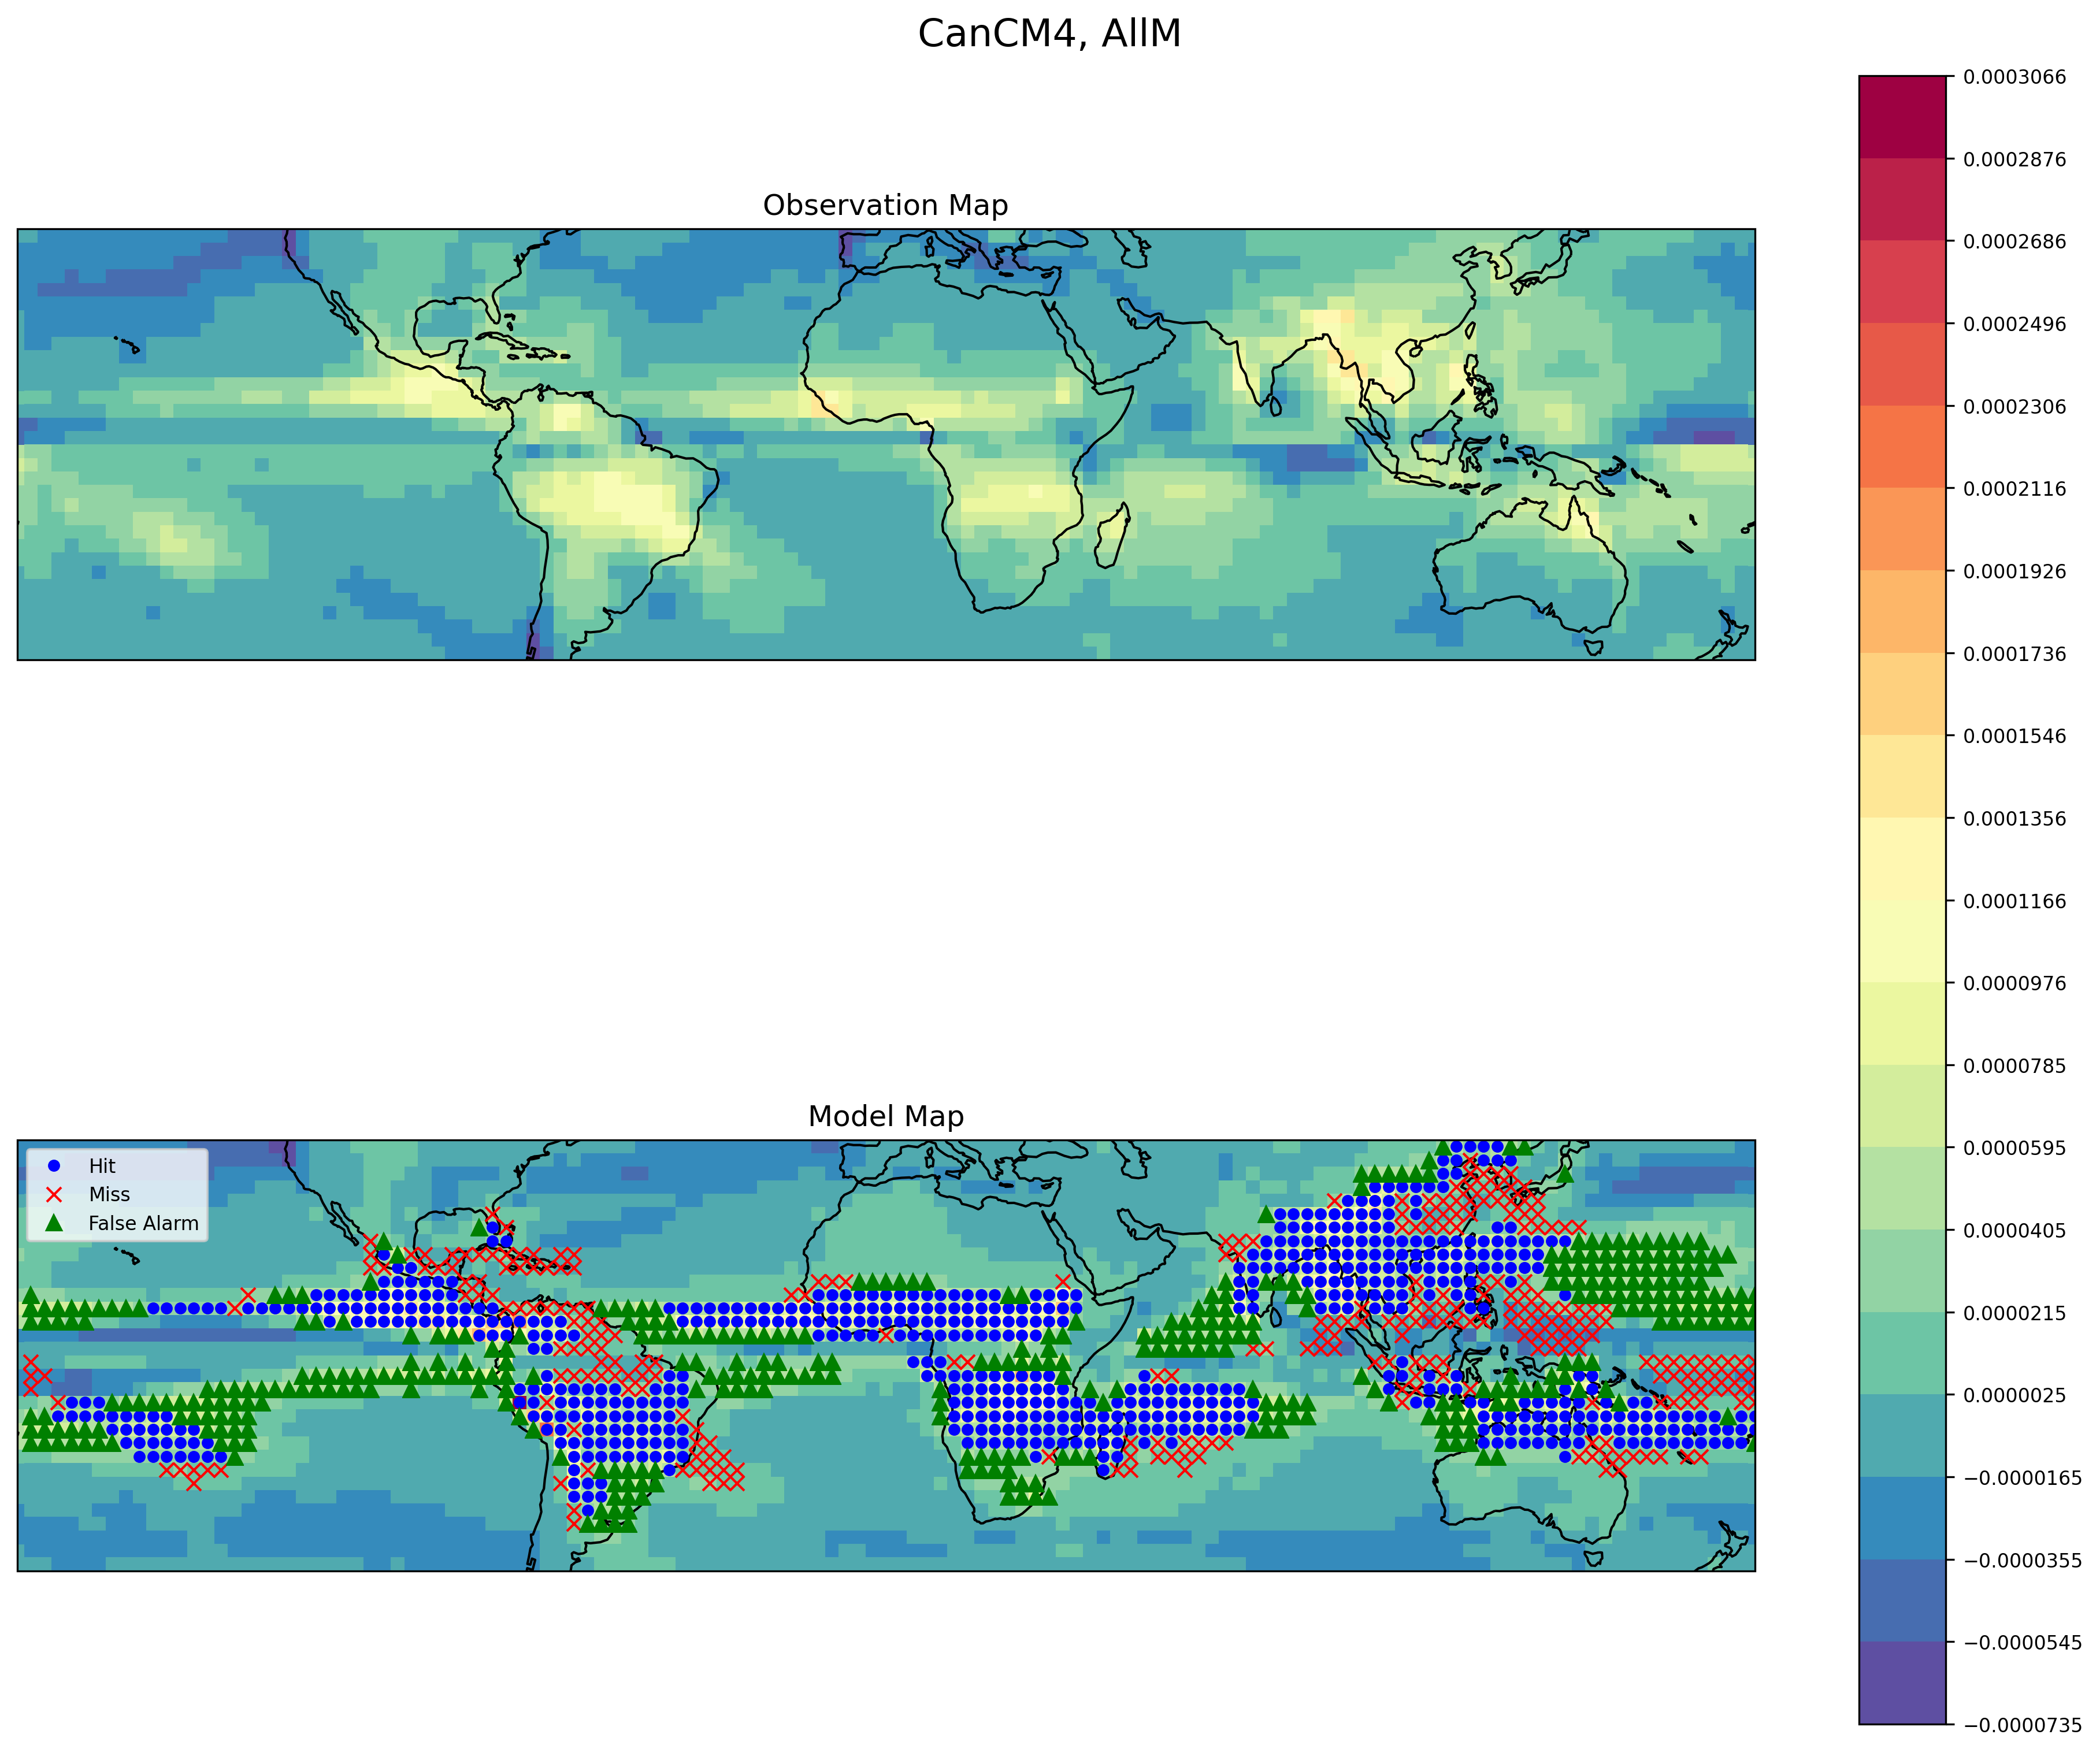

In [22]:
a = Image(list_files[0])
display_png(a)

Number of PNG files: 8


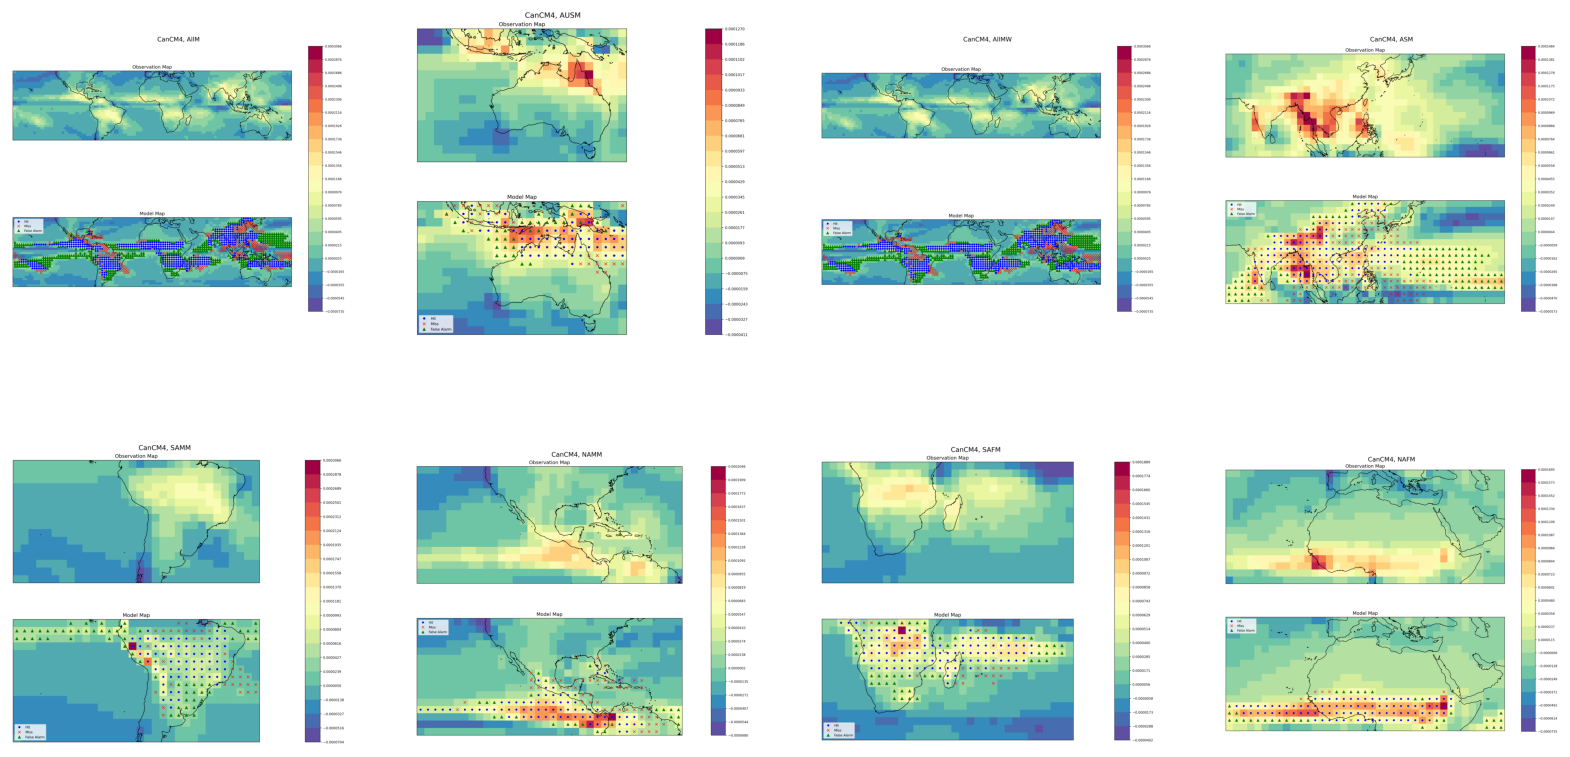

In [23]:
# figure size in inches optional
rcParams['figure.figsize'] = 16, 12

# Count the number of PNG files
num_files = len(list_files)
print(f"Number of PNG files: {num_files}")

# Display all PNG files in 2 rows
fig, axes = plt.subplots(2, num_files // 2, figsize=(20, 10))
axes = axes.flatten()
for i, file in enumerate(list_files):
    img = mpimg.imread(file)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

The metrics are saved to monsoon_wang.json, opened below.

In [4]:
import json
import os
with open(os.path.join(demo_output_directory, "monsoon_wang/monsoon_wang.json")) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "CanCM4": {
    "AllMW": {
      "cor": "0.735",
      "rmsn": "0.550",
      "threat_score": "0.479"
    },
    "AllM": {
      "cor": "0.735",
      "rmsn": "0.562",
      "threat_score": "0.479"
    },
    "NAMM": {
      "cor": "0.586",
      "rmsn": "0.694",
      "threat_score": "0.497"
    },
    "SAMM": {
      "cor": "0.766",
      "rmsn": "0.660",
      "threat_score": "0.441"
    },
    "NAFM": {
      "cor": "0.864",
      "rmsn": "0.452",
      "threat_score": "0.691"
    },
    "SAFM": {
      "cor": "0.748",
      "rmsn": "0.467",
      "threat_score": "0.646"
    },
    "ASM": {
      "cor": "0.758",
      "rmsn": "0.555",
      "threat_score": "0.394"
    },
    "AUSM": {
      "cor": "0.728",
      "rmsn": "0.631",
      "threat_score": "0.525"
    }
  }
}


### Command line options

The following example shows how to use the command line to specify one model, increase the threshold to 3 mm/day (for data in kg m-2 s-1), change the name of the output json (`outnj`), and specify the model experiment and MIP:

In [6]:
%%bash
monsoon_wang_driver.py -p basic_monsoon_wang_param.py \
--modnames "['CanCM4']" \
--results_dir 'demo_output_tmp/monsoon_wang_ex2' \
--outnj "monsoon_wang_ex2" \
--experiment historical \
--MIP cmip5 \
--threshold 0.00003472222

/Users/lee1043/mambaforge/envs/pmp_devel_20241126/lib/python3.10/site-packages/pcmdi_metrics/utils/string_constructor.py:43: UserWarning: Keyword 'model' not provided for filling the template.
  warnings.warn(f"Keyword '{k}' not provided for filling the template.")


modelFile =   demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc
dom =   AllMW
Figure(1200x1000)
dom =   AllM
Figure(1200x1000)
dom =   NAMM
Figure(1200x1000)
dom =   SAMM
Figure(1200x1000)
dom =   NAFM
Figure(1200x1000)
dom =   SAFM
Figure(1200x1000)
dom =   ASM
Figure(1200x1000)
dom =   AUSM
Figure(1200x1000)


INFO::2024-11-28 13:51::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang_ex2/monsoon_wang_ex2.json
2024-11-28 13:51:24,087 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang_ex2/monsoon_wang_ex2.json
2024-11-28 13:51:24,087 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_wang_ex2/monsoon_wang_ex2.json


Opening the new results file, you will find that the threat_scores have changed slightly as a result of changing the threshold.

In [8]:
with open(os.path.join(demo_output_directory, "monsoon_wang_ex2/monsoon_wang_ex2.json")) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "CanCM4": {
    "AllMW": {
      "cor": "0.730",
      "rmsn": "0.547",
      "threat_score": "0.457"
    },
    "AllM": {
      "cor": "0.730",
      "rmsn": "0.559",
      "threat_score": "0.457"
    },
    "NAMM": {
      "cor": "0.540",
      "rmsn": "0.732",
      "threat_score": "0.492"
    },
    "SAMM": {
      "cor": "0.700",
      "rmsn": "0.661",
      "threat_score": "0.432"
    },
    "NAFM": {
      "cor": "0.858",
      "rmsn": "0.425",
      "threat_score": "0.715"
    },
    "SAFM": {
      "cor": "0.774",
      "rmsn": "0.433",
      "threat_score": "0.665"
    },
    "ASM": {
      "cor": "0.773",
      "rmsn": "0.542",
      "threat_score": "0.370"
    },
    "AUSM": {
      "cor": "0.676",
      "rmsn": "0.666",
      "threat_score": "0.417"
    }
  }
}
